In [1]:
import numpy as np
from sympy import *
from sympy.combinatorics import Permutation
init_printing()

### Найдите значение параметра $a$, при котором система имеет единственное решение

In [6]:
a = symbols("a")
A = Matrix(4,3,[6,6,6,2,8,4,7,8,7,2,5,4])
B = Matrix([3,a,5,4])
AB = Matrix([[A, B]])
res = solve(AB.echelon_form()[3,3])
res

### Выразить $y$

In [48]:
A = Matrix(3,4,[16,31,54,30,15,29,58,35,33,10,21,13])
B = Matrix([41,44,26])
AB = Matrix([[A, B]])
AB = AB.elementary_col_op("n<->m", col1=0, col2=3)
AB.rref()[0]

⎡1  0  0  6455   2337 ⎤
⎢                     ⎥
⎢0  1  0  4174   1511 ⎥
⎢                     ⎥
⎣0  0  1  -5982  -2165⎦

$y = 1511 - 4174x$

### Геометрия на плоскости

In [313]:
A = Point(41, 44)
B = Point(13, 6)
C = Point(3, 42)

# Уравнение прямой BC
line_BC = Line(B, C)

# Перпендикуляр из точки A на прямую BC, находящий ближайшую точку D
D = line_BC.projection(A)

# Координаты точки D
x_D, y_D = D.coordinates

# Расстояние от A до D
R = A.distance(D)

x_D.evalf(), y_D.evalf(), R.evalf()

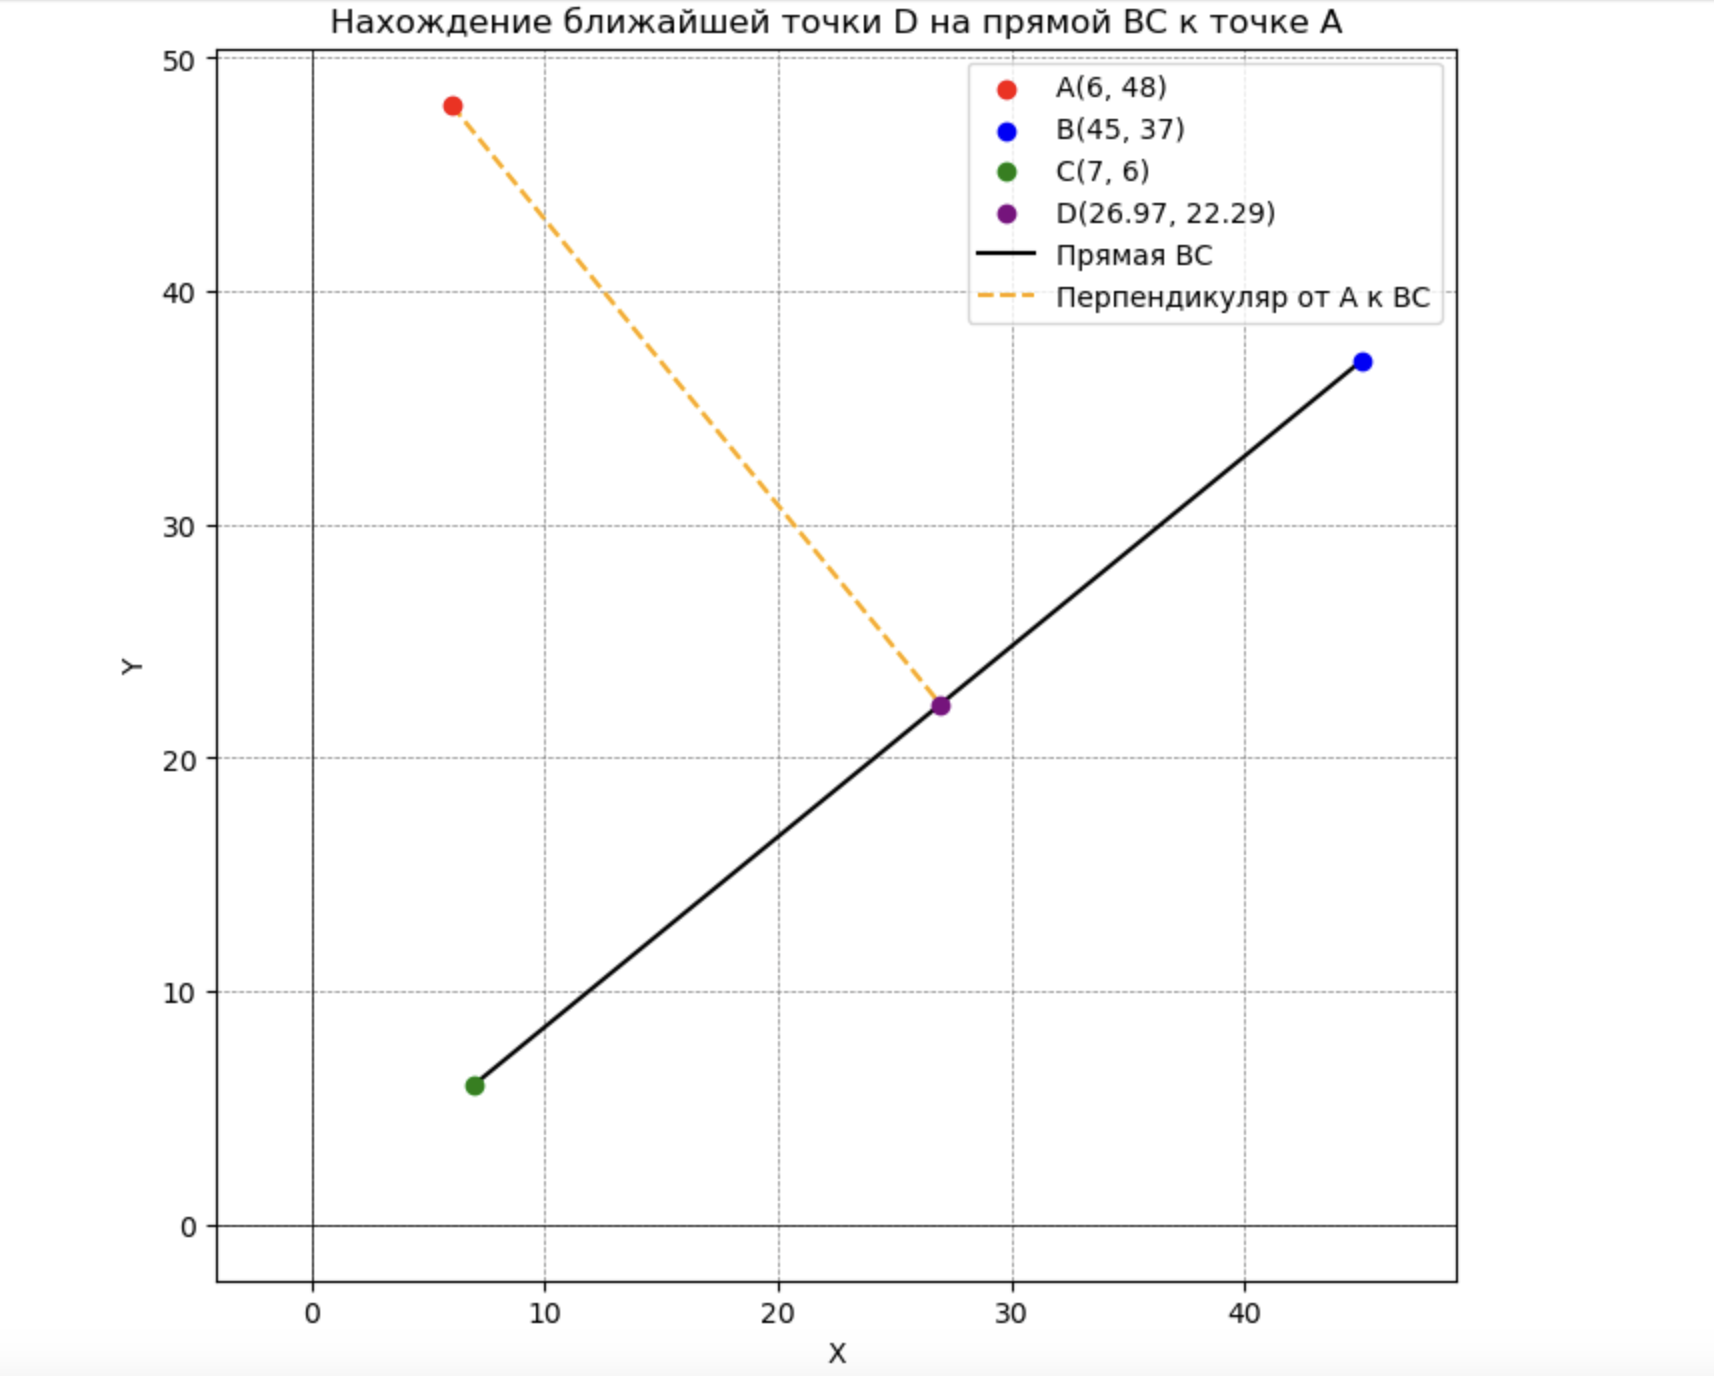

### Произведение Кронекера и след матрицы

In [9]:
A = Matrix(2, 3, [2,4,4,8,6,3])
B = Matrix(2, 3, [1,4,3,2,2,5])
C = A.T * B
D = A * B.T
K = Matrix(np.kron(C, D))

trace(C), trace(K)

### Перестановки

In [87]:
n = 12
sigma_list = [1, 12, 8, 4, 5, 3, 6, 9, 10, 7, 11, 2]

sigma = Permutation([i-1 for i in sigma_list])
A = PermutationMatrix(sigma).as_explicit()

A3 = A**3

m = 1
while True:
    if trace(A**m) == 12:
        break
    m += 1

trace(A3), m

### Запишите определитель в виде многочлена

In [90]:
x = symbols("x")
M = Matrix(4,4,[7,5,3,3,6,9,x,6,6,1,6,7,x,2,3,4])

expand(simplify(M.det()))

### При каком $t$ матрица содержит столбец, являющийся линейной комбинацией других столбцов

In [93]:
t = symbols("t")
A = Matrix(4,4,[8,9,7,9,7,8,2,5,1,8,5,0,9,1,5,7])
B = Matrix(4,4,[1,0,3,9,3,8,5,1,8,6,1,7,0,6,t,2])
C = A*B
C

⎡91  168  9⋅t + 76  148⎤
⎢                      ⎥
⎢47  106  5⋅t + 63  95 ⎥
⎢                      ⎥
⎢65  94      48     52 ⎥
⎢                      ⎥
⎣52  80   7⋅t + 37  131⎦

* Если det = 0 (для квадратной матрицы), то столбцы линейно зависимы
* Если не квадратная, то rank < n, где n - число столбцов

In [96]:
solve(C.det())

### Матрицы $S$ и $B$

In [98]:
y = 0.103

A = Matrix(2,2,[7*y, 3*y, 2*y, 5*y])
I = eye(2)


def Matrix_s(m, n):
    S = zeros(2)
    for i in range(m, n+1):
        S += A**i
    return S

S = Matrix_s(2,70)
B = (I - A).inv() * A**2

tollerance = 0.0002
found_k = None
for k in range(1, 1000):
    all_bellow_tollerance = True
    for n in range(k+1, k+50):
        S_kn = Matrix_s(k, n)
        if np.max(S_kn) >= tollerance:
            all_bellow_tollerance = False
    if all_bellow_tollerance:
        found_k = k
        break

max(S), max(B), found_k

### Комплексный корень лямбда из 1 степени 15

In [3]:
A = np.array([[8, 5], [2, 4]])
I = np.eye(2)


n = 15
roots = [np.exp(2j * np.pi * k / n) for k in range(n)]
lam = max((z for z in roots if im(z) > 0), key=lambda z: re(z))

matrix = A + lam*I

det = np.linalg.det(matrix)

det.real, det.imag

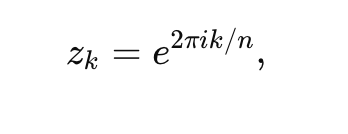

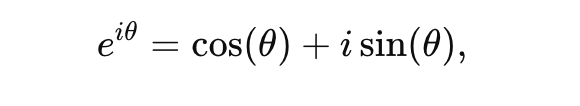

### Корни многочлена

In [145]:
x = Symbol("x", dtype=complex)
p = x**12 - x**11 + 2*x**10 + x**9 - x**8 - x**7 + x**6 + x**5 - x**4 + x**3 - 2*x**2 + 2
r = nroots(p, n=12)
mod_z = sum(abs(np.array(r)))
max_z = max(r, key=lambda x: re(x))
mod_z, re(max_z)

### Собственные значения и вектора матрицы 

In [170]:
A = np.array([
    [24,28,20],
    [15,21,12],
    [10,25,11]
])

factor(Matrix(A).charpoly().as_expr())

In [190]:
vals, vects = np.linalg.eig(A)
ind = np.argmax(vals.imag)
z = vals[ind]
x = vects[:, ind]
u = x[1]/x[0]

im(z), re(u)

### Матрицы больших размеров

#### Арифметическая прогрессия

In [269]:
a11, ann, a12, a21, n, d, i = symbols("a11, ann, a12, a21, n, d, i")

def f(i, j):
    if i == j:
        return a11 + d * j
    else:
        if i == 0 and j == 1:
            return a12
        if i == 1 and j == 0:
            return a21
        else:
            return 0

A = Matrix(10,10,f)
B = A.inv()

S = Sum(1/(a11 + i*d), (i,2,n-1))
trace = (2*a11 + d)/(a11**2 + a11*d - a12*a21) + S
print(f"След A.inv(): {N(trace.subs([(n, 70000), (a11, 0.99), (ann, 1.01), (a12, 0.46), (a21, 0.78), (d, (1.01-0.99)/(70000-1))]),8)}")

P = Product(a11 + i*d, (i,2,n-1))
det = expand(a11*(a11+d) - a12*a21) * P
print(f"det(A): {N(det.subs([(n, 70000), (a11, 0.99), (ann, 1.01), (a12, 0.46), (a21, 0.78), (d, (1.01-0.99)/(70000-1))]),3)}")

След A.inv(): 70003.500
det(A): 0.197


#### Геометрическая прогрессия

In [315]:
a11, q, d = symbols("a11, q, d")

def f(i, j):
    if i == j:
        return a11*q**i
    else:
        if i == 0:
            return a11 + j*d
        else:
            return 0
        

A = Matrix(5,5,f)
B = A.inv()

n = 40000
a11 = 1
ann = 1.09
a1n = 1.17
d = (a1n - a11) / (n-1)
q = (ann / a11) ** (1 / (n-1))
B1i = [1 / a11]
Bii = [1 / a11]
for i in range(2, n+1):
    B1i.append((-a11-(i-1)*d) / (a11**2 * q**(i-1)))
    Bii.append(1/(a11 * q**(i-1)))


min(min(B1i), min(Bii)), sum(B1i) + sum(Bii) - (1/a11)